# Introduction : Analyse du jeu de données MPG

Dans ce tutoriel, nous allons explorer en détail le jeu de données "mpg". Ce jeu de données, initialement publié par la bibliothèque StatLib de l'Université Carnegie Mellon et désormais disponible dans la bibliothèque Seaborn. L'objectif de ce tutoriel est d'explorer la relation entre la consommation de carburant (Miles Per Gallon, ou MPG) et diverses autres caractéristiques de ce jeu de données.

Le jeu de données "mpg" est particulièrement intéressant pour notre étude car il présente une combinaison de caractéristiques discrètes et continues. Il contient :

- 3 caractéristiques discrètes : Ces variables catégorielles nous permettront d'analyser des groupes ou des classifications au sein des données.
- 5 caractéristiques continues : Ces variables numériques nous permettront d'examiner des relations et des tendances quantitatives.

In [1]:
import seaborn as sns
# load a seaborn dataset
mpg_df = sns.load_dataset("mpg")
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


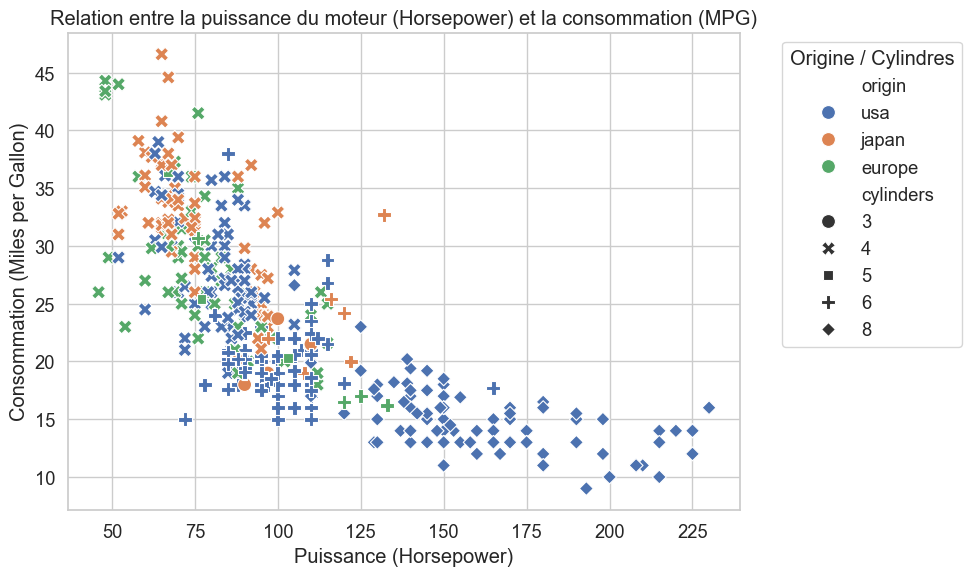

In [4]:
# Importation des bibliothèques nécessaires
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement du jeu de données
mpg_df = sns.load_dataset("mpg")

# Nettoyage (certains horsepower peuvent être manquants)
mpg_df = mpg_df.dropna(subset=['horsepower'])

# Définition du style graphique
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Création du scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=mpg_df,
    x="horsepower",
    y="mpg",
    hue="origin",     # Origine du véhicule : US, Europe, Japan
    style="cylinders",# Style de point selon le nombre de cylindres
    palette="deep",
    s=100
)

# Titres et étiquettes
plt.title("Relation entre la puissance du moteur (Horsepower) et la consommation (MPG)")
plt.xlabel("Puissance (Horsepower)")
plt.ylabel("Consommation (Miles per Gallon)")
plt.legend(title="Origine / Cylindres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
